# Argon worksheet compute everything

## Import all functions from ArgonFunc

In [1]:
import ArgonFunc as ar
from imp import reload
reload(ar);
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

### Compute Cv using a energy conserving program
First, gas conditions where rho = 0.01 and T = 2 

Then, solid conditions where rho = 0.99 and T = 0.1

In [2]:
# --------- conserve E program --------------
# This block just runs the program under certain preset conditions:
# gas conditions where rho = 0.01 and T = 2 

numtime = 40000

pos,vel,rho,T,n,timesteps,dt,N,L = ar.init_params(rhopar=0.01,Tpar=2,npar=6,tfinpar=numtime)
pos2,vel2,K,V,rV,discard = ar.evolveTimeConserveE(pos,vel,timesteps,N,L,dt)


In [3]:
# This block computes the Cv from the results of either of the above blocks of presets.

Nblocks = 10
fromBlock = 1 # Discard first block to reach equilibrium
Cv = np.empty(Nblocks)
j = numtime//Nblocks
for i in range(Nblocks):
    Cv[i] = 1 / (2/(3*N) - np.var(K[i*j:(i+1)*j])/(K[i*j:(i+1)*j].mean()**2))
    
# print(Cv/N)
print("Cv/kb/N = ",Cv[fromBlock::].mean()/N, " +/- ", 2*np.std(Cv[fromBlock::]/N))
print("relError = ",2*np.std(Cv[fromBlock::]/N) / (Cv[fromBlock::].mean()/N) * 100, "%")
# ar.plotEnergy(timesteps,K,V)
# ar.plotParticles(pos2,L)
# ar.plt.show()

Cv/kb/N =  1.51049133461  +/-  0.00526375194796
relError =  0.348479453496 %


In [4]:
# --------- conserve E program --------------
# This block just runs the program under certain preset conditions:
# solid conditions where rho = 0.99 and T = 0.1
# FEW HOURS RUNTIME!
numtime = 600000

pos,vel,rho,T,n,timesteps,dt,N,L = ar.init_params(0.99,0.1,6,numtime)
pos2,vel2,K,V,rV,discard = ar.evolveTimeConserveE(pos,vel,timesteps,N,L,dt)

In [5]:
# This block computes the Cv from the results of either of the above blocks of presets.

Nblocks = 10
fromBlock = 1 # Discard first block to reach equilibrium
Cv = np.empty(Nblocks)
j = numtime//Nblocks
for i in range(Nblocks):
    Cv[i] = 1 / (2/(3*N) - np.var(K[i*j:(i+1)*j])/(K[i*j:(i+1)*j].mean()**2))
    
# print(Cv/N)
print("Cv/kb/N = ",Cv[fromBlock::].mean()/N, " +/- ", 2*np.std(Cv[fromBlock::]/N))
print("relError = ",2*np.std(Cv[fromBlock::]/N) / (Cv[fromBlock::].mean()/N) * 100, "%")
# ar.plotEnergy(timesteps,K,V)
# ar.plotParticles(pos2,L)
# ar.plt.show()

Cv/kb/N =  2.99473643252  +/-  0.12344102899
relError =  4.12193299047 %


### Find the pressure for various densities and temperatures

In [6]:
# -------- Fixed T program ------------------
Tij = np.tile(np.array([1.0, 1.35, 2.74]),(9,1))
rhoij = np.array([[0.65, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84 ],[0.1, 0.2, 0.3, 0.4, 0.5, 0.55, 0.6, 0.65, 0.7],[0.1, 0.2, 0.3, 0.4, 0.5, 0.55, 0.6, 0.65, 0.7]]).T
Pij = np.zeros_like(Tij)
PijUncertainty = np.zeros_like(Tij)
numtime = 20000
Nblocks = 20
l = numtime//Nblocks
fromBlock = 1 # Discard first block to reach equilibrium

for i in range(Tij.shape[0]):
    for j in range(Tij.shape[1]):
        pos,vel,rho,T,n,timesteps,dt,N,L = ar.init_params(rhoij[i][j],Tij[i][j],6,numtime)
        pos2,vel2,K,V,rV = ar.evolveTimeFixedT(pos,vel,timesteps,N,L,dt,T)
        Ptemp = np.empty(Nblocks)
        for k in range(Nblocks):
            Ptemp[k] = np.mean(1/(L**3) * ( 2*K[k*l:(k+1)*l] - rV[k*l:(k+1)*l] )/3)
        Pij[i][j] = np.mean(Ptemp[fromBlock::])
        PijUncertainty[i][j] = 2*np.std(Ptemp[fromBlock::])
       

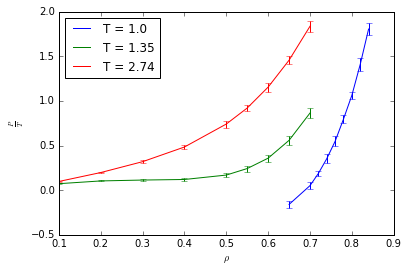

In [14]:
# Produce plot
plt.figure()
plt.errorbar(rhoij[:,0],Pij[:,0]/Tij[:,0],yerr = PijUncertainty[:,0])
plt.errorbar(rhoij[:,1],Pij[:,1]/Tij[:,1],yerr = PijUncertainty[:,1])
plt.errorbar(rhoij[:,2],Pij[:,2]/Tij[:,2],yerr = PijUncertainty[:,2])
plt.legend(('T = ' + str(Tij[0][0]),'T = ' + str(Tij[0][1]),'T = ' + str(Tij[0][2])),loc=2)
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\frac{P}{T}$')
plt.show()

### Pair correlation function computation

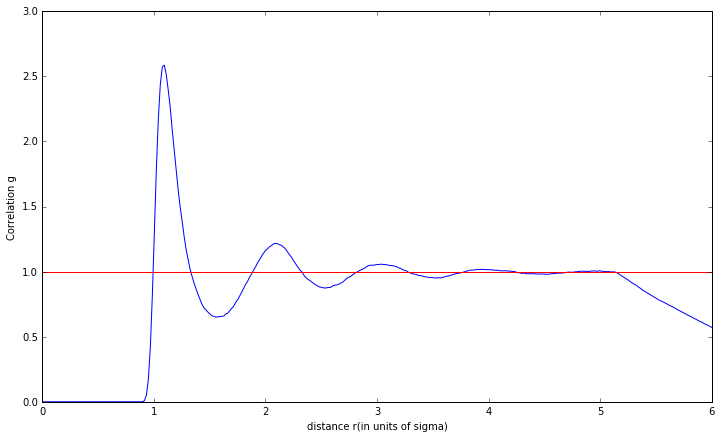

In [17]:
#for liquid
pos,vel,rho,T,n,timesteps,dt,N,L = ar.init_params(0.8,1,6,4000)
pos2,vel2,K,V,rV, nr = ar.evolveTimeFixedTAndCalcG(pos,vel,timesteps,N,L,dt,T, 1000)
rVec, g = ar.correlation(N, L, len(nr[0,:]), nr, 2000)
plt.figure(figsize = (12,7))
plt.plot(rVec, g)
plt.ylim((0,3))
plt.xlim((0,6))
plt.xlabel('distance r(in units of sigma)')
plt.ylabel('Correlation g')
plt.axhline(1, color="r")
# plt.title("correlation function for Gas T = %.2f rho=%.2f" % (T, rho))
plt.show()

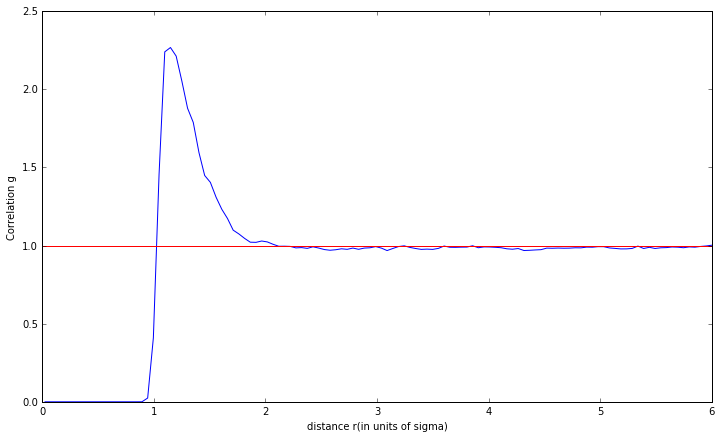

In [4]:
#for gas
pos,vel,rho,T,n,timesteps,dt,N,L = ar.init_params(0.01,1,6,12000)
pos2,vel2,K,V,rV, nr = ar.evolveTimeFixedTAndCalcG(pos,vel,timesteps,N,L,dt,T, 1500)
rVec, g = ar.correlation(N, L, len(nr[0,:]), nr, 2000)
plt.figure(figsize = (12,7))
plt.plot(rVec, g)
plt.xlim((0,6))
plt.xlabel('distance r(in units of sigma)')
plt.ylabel('Correlation g')
plt.axhline(1, color="r")
# plt.title("correlation function for Liquid T = %.2f rho=%.2f" % (T, rho))
plt.show()

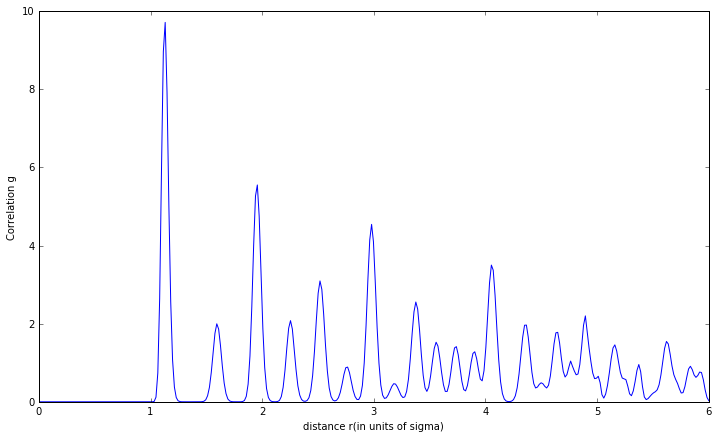

In [19]:
#for solid
pos,vel,rho,T,n,timesteps,dt,N,L = ar.init_params(1.0,0.1,6,4000)
pos2,vel2,K,V,rV, nr = ar.evolveTimeFixedTAndCalcG(pos,vel,timesteps,N,L,dt,T, 1000)
rVec, g = ar.correlation(N, L, len(nr[0,:]), nr, 2000)
plt.figure(figsize = (12,7))
plt.plot(rVec, g)
plt.ylim((0,10))
plt.xlim((0,6))
plt.xlabel('distance r(in units of sigma)')
plt.ylabel('Correlation g')
# plt.title("correlation function for Solid T = %.2f rho=%.2f" % (T, rho))
plt.show() 

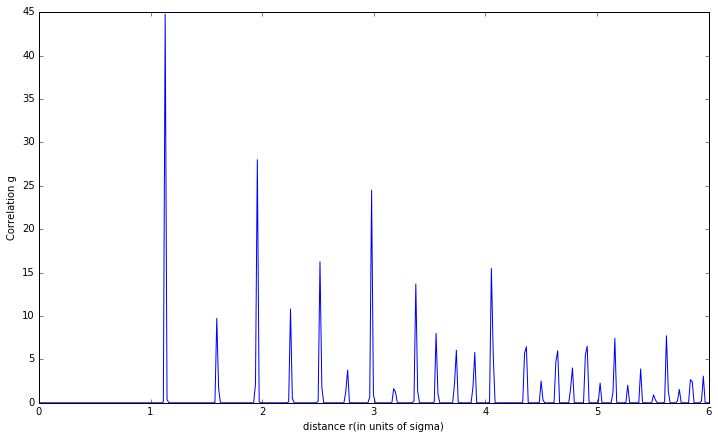

In [6]:
#for solid with lower temperature
pos,vel,rho,T,n,timesteps,dt,N,L = ar.init_params(1.0,0.001,6,6000)
pos2,vel2,K,V,rV, nr = ar.evolveTimeFixedTAndCalcG(pos,vel,timesteps,N,L,dt,T, 1000)
rVec, g = ar.correlation(N, L, len(nr[0,:]), nr, 2000)
plt.figure(figsize = (12,7))
plt.plot(rVec, g)
plt.xlim((0,6))
plt.xlabel('distance r(in units of sigma)')
plt.ylabel('Correlation g')
# plt.title("correlation function for Solid T = %.2f rho=%.2f" % (T, rho))
plt.show() 

### Computation of diffusion constant

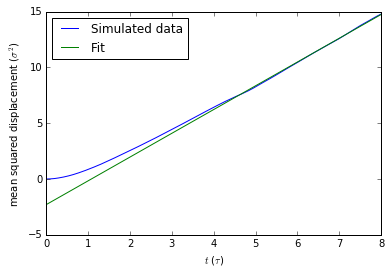

In [85]:
# --------- Diffusion plots --------------
# gas conditions where rho = 0.2 and T = 1 

numtime = 2000

pos,vel,rho,T,n,timesteps,dt,N,L = ar.init_params(rhopar=0.2,Tpar=1,npar=6,tfinpar=numtime)
pos2,vel2,K,V,rV,msd = ar.evolveTimeConserveE(pos,vel,timesteps,N,L,dt)
t = np.linspace(0,numtime-1,numtime)*dt
p = np.polyfit(t[numtime//2:numtime],msd[numtime//2:numtime],1)
fit = np.polyval(p,t)
plt.figure()
plt.plot(t, msd)
plt.plot(t, fit)
#plt.ylim((0,2600))
plt.legend(('Simulated data','Fit'),loc=2)
plt.xlabel(r'$t$ ($\tau$)')
plt.ylabel(r'mean squared displacement ($\sigma^2$)')
plt.show() 

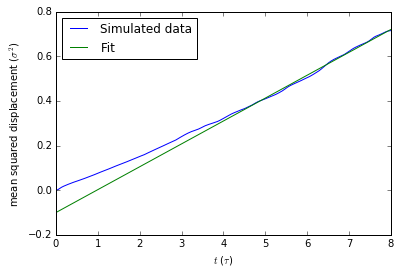

In [86]:
# --------- Diffusion plots --------------
# liquid conditions where rho = 0.75 and T = 1 

numtime = 2000

pos,vel,rho,T,n,timesteps,dt,N,L = ar.init_params(rhopar=0.75,Tpar=1,npar=6,tfinpar=numtime)
pos2,vel2,K,V,rV,msd = ar.evolveTimeConserveE(pos,vel,timesteps,N,L,dt)
t = np.linspace(0,numtime-1,numtime)*dt
p = np.polyfit(t[numtime//2:numtime],msd[numtime//2:numtime],1)
fit = np.polyval(p,t)
plt.figure()
plt.plot(t, msd)
plt.plot(t, fit)
#plt.ylim((0,2600))
plt.legend(('Simulated data','Fit'),loc=2)
plt.xlabel(r'$t$ ($\tau$)')
plt.ylabel(r'mean squared displacement ($\sigma^2$)')
plt.show() 

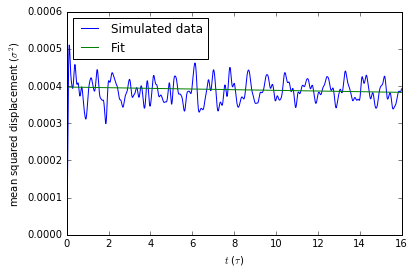

In [87]:
# --------- Diffusion plots --------------
# solid conditions where rho = 1 and T = 0.1 

numtime = 4000

pos,vel,rho,T,n,timesteps,dt,N,L = ar.init_params(rhopar=1,Tpar=0.1,npar=6,tfinpar=numtime)
pos2,vel2,K,V,rV,msd = ar.evolveTimeConserveE(pos,vel,timesteps,N,L,dt)
t = np.linspace(0,numtime-1,numtime)*dt
p = np.polyfit(t[numtime//2:numtime],msd[numtime//2:numtime],1)
fit = np.polyval(p,t)
plt.figure()
plt.plot(t, msd)
plt.plot(t, fit)
#plt.ylim((0,2600))
plt.legend(('Simulated data','Fit'),loc=2)
plt.xlabel(r'$t$ ($\tau$)')
plt.ylabel(r'mean squared displacement ($\sigma^2$)')
plt.show() 